<a href="https://colab.research.google.com/github/johan92lee/z2m-tf-tutorials/blob/main/01_neural_network_regression_with_tensor_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regressoijn with Neutal Network s in TensorFlow

Notebook following Z2M TensorFlow tutorial

In [1]:
# Import TensorFlow

import tensorflow as tf
print(tf.__version__)

2.6.0


## Creating data to view and fit

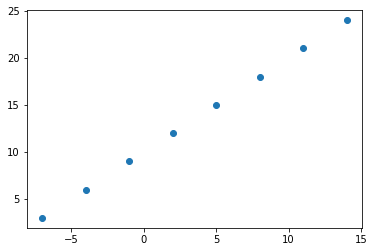

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create  features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualise it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Let's create a demo tensor for our hhousing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [6]:
X.ndim

1

In [7]:
# Turn out numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype= tf.float32)
y = tf.cast(tf.constant(y), dtype= tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function and the optimizer and evaluation metrics
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels)

In [9]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model ising a Sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss=tf.keras.losses.mae, # Mean absolute error
              optimizer= tf.keras.optimizers.SGD(), # shocastic gradient descent
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(X, y, epochs= 5)

Epoch 1/5
1/1 [==============================] - 1s 581ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [10]:
# Check out X and y
X , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization fnction or perhaps the learning rate of the optimizing function.
3. **Fitting a model** - here we might fit a model or more epochs or on more data

In [12]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr= 0.01),
              metrics= ["mae"])

#3. Fit the model
model.fit(X, y, epochs= 100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 286ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.1769 - mae: 11.1769
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.1319 - mae: 11.1319
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.0869 - mae: 11.0869
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 11.0419 - mae: 11.0419
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9969 - mae: 10.9969
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9519 - mae: 10.9519
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9069 - mae: 10.9069
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.8619 - mae: 10.8619
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8169 - mae: 10.8169
Epoch 11/100
1/1 [==============================] - 0s 8m

In [13]:
y_pred = model.predict([17.0])
y_pred

array([[29.064844]], dtype=float32)

In [14]:
# Lets see if we can make another to improve our model

# 1. Creating a model
model = tf.keras.Sequential([tf.keras.layers.Dense(50, activation="relu"),
                             tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss= "mae",
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs= 100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 356ms/step - loss: 12.1311 - mae: 12.1311
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.6065 - mae: 11.6065
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0744 - mae: 11.0744
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5398 - mae: 10.5398
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0000 - mae: 10.0000
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4507 - mae: 9.4507
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 8.8902 - mae: 8.8902
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.4837 - mae: 8.4837
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.0587 - mae: 8.0587
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.6149 - mae: 7.6149
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - 

In [16]:
y_pred = model.predict([17.0])
y_pred

array([[22.11536]], dtype=float32)

## Evaluating a model

In practive, a typical workflow you'll go through when building nuearal network is:

```
Build a model > fit it > evaluate it > tweak it > fit it > evaluate it >....
```

When it comes to evaluation... there are 3 words to memorize

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The prediciton of the model - how do the predictions of a mpodel line up against the ground truth

In [17]:
# Mae a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [18]:
# Make labels for the data set
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

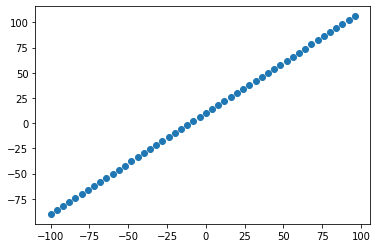

In [19]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...
* Training sets - model learns from this data, which is typically 70-80% of the total data available
* Validation sets - moel gets tuned on this data, which is typically 10-15% of the total data
* Test sets - model gets evaluated on this data to test what it has learned, which is typically 10-15% of the total data

In [20]:
# Check the length of of how many samples we have
len(X)

50

In [21]:
# Split the data into train test data
X_train = X[:40] # first 40 are the training samples
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the data

Now we've got our datra in training and test sets, lets visualize it again!

<function matplotlib.pyplot.legend>

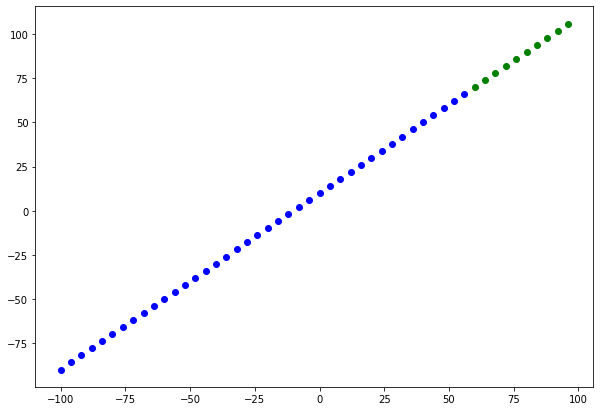

In [22]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label= "Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label= "Testing data")

#Show legend
plt.legend

In [23]:
# Let's have a look at how we can creat a neural network for our data

# Create a model
model = tf.keras.Sequential([ 
                            tf.keras.layers.Dense(1)
                            ])

# Compile the model 
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(X_train, y_train, epochs= 100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 10.5273 - mae: 10.5273
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 9.3906 - mae: 9.3906
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 7.6292 - mae: 7.6292
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.6859 - mae: 9.6859
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0740 - mae: 11.0740
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 10.2264 - mae: 10.2264
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2347 - mae: 9.2347
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.1547 - mae: 9.1547
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 11.7875 - mae: 11.7875
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 13.7172 - mae: 13.7172
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - los

## Visualizing the model

In [25]:
model.summary()

<module 'tensorboard.summary._tf.summary' from '/usr/local/lib/python3.7/dist-packages/tensorboard/summary/_tf/summary/__init__.py'>

In [30]:
# Lets create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# Creata a model 
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape= [1])
                             ])

# Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])



In [31]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total numbers of parameters in the model.
* Trainable parameters- thses are  parameters the model can update as it trains
* Non-trainable params - these parameters are not updated during training (typically when you bring in already learn patterns or parameters from other model during **transfer learning**)

In [32]:
# Lets fit our model to the training data
model.fit(X, y, epochs=100, verbose=0)